In [36]:
import pandas as pd
import numpy as np
import math
from helpers import process_data

## Import dataset
see [helpers.py](./helpers.py) for more details

In [37]:
df = process_data('dataset_output/raw_training_data_cleaned_up.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100702 entries, 0 to 100701
Data columns (total 45 columns):
race                        100702 non-null int64
gender                      100702 non-null int64
age                         100702 non-null int64
admission_type_id           100702 non-null int64
discharge_disposition_id    100702 non-null int64
admission_source_id         100702 non-null int64
time_in_hospital            100702 non-null int64
num_lab_procedures          100702 non-null int64
num_procedures              100702 non-null int64
num_medications             100702 non-null int64
number_outpatient           100702 non-null int64
number_emergency            100702 non-null int64
number_inpatient            100702 non-null int64
diag_1                      100702 non-null int64
diag_2                      100702 non-null int64
diag_3                      100702 non-null int64
number_diagnoses            100702 non-null int64
max_glu_serum               100702 non-

#### All columns are using encoded int's. Great! 

# Random forest

#### How to pick parameters: http://scikit-learn.org/stable/modules/ensemble.html#parameters

scikit-learn uses randomly selected features to determine how to split a node when constructing a tree (http://scikit-learn.org/stable/modules/ensemble.html#random-forests)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### 1) Construct training and testing sets
TODO: validation sets

In [39]:
# Separate input and output features 
# Original df is not mutated
X = df.drop(['discharge_disposition_id','admission_type_id'], axis=1)

# columns of the values we want to predict which we use to train our model
y_disposition = df['discharge_disposition_id']
y_admission = df['admission_type_id']

# For disposition statuses
X_disposition_train, X_disposition_test, y_disposition_train, y_disposition_test = train_test_split(X, y_disposition, test_size=0.3)

# For admission statuses
X_admission_train, X_admission_test, y_admission_train, y_admission_test = train_test_split(X, y_admission, test_size=0.3)

### 2) Run RandomForestClassifier to train our model

In [52]:
admission_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1 )
disposition_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1 )

admission_classifier.fit(X_admission_train, y_admission_train)
disposition_classifier.fit(X_disposition_train, y_disposition_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### 3) Predict!

In [53]:
# predict classes for data in test_set
predict_admission = admission_classifier.predict(X_admission_test) 
predict_disposition = disposition_classifier.predict(X_disposition_test)

### 4) Evaluate our model

~~Since scikit doesn't support multiclass-multilabel, we have to do this manually in a simple, basic way for now.~~ (I was using multiclass multilabel classifiers. But I'm experimenting multiclass single-label now.)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(predict_admission, y_admission_test))

             precision    recall  f1-score   support

          1       0.95      0.86      0.90     17740
          2       0.37      0.58      0.45      3523
          3       0.78      0.67      0.72      6514
          4       0.00      0.00      0.00         0
          5       0.66      0.69      0.67      1325
          6       0.68      0.96      0.79      1109
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0

avg / total       0.82      0.78      0.79     30211



/Users/Domingo/deep_health/training_model/env/lib/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [56]:
print(classification_report(predict_disposition, y_disposition_test))

             precision    recall  f1-score   support

          1       0.96      0.65      0.78     26270
          2       0.00      1.00      0.00         1
          3       0.36      0.46      0.40      3221
          4       0.00      0.00      0.00         1
          5       0.00      0.00      0.00         0
          6       0.06      0.36      0.11       668
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         0
         10       0.00      0.00      0.00         0
         11       0.00      1.00      0.00         1
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00      0.00      0.00         0
         18       0.01      0.36      0.03   

/Users/Domingo/deep_health/training_model/env/lib/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Feature importances

Feature ranking - admission statuses:
1. feature 3 (0.318625)
2. feature 5 (0.089583)
3. feature 7 (0.063991)
4. feature 11 (0.048681)
5. feature 13 (0.044545)
6. feature 4 (0.044473)
7. feature 12 (0.043723)
8. feature 15 (0.041968)
9. feature 6 (0.041064)
10. feature 2 (0.035789)
11. feature 14 (0.031744)
12. feature 10 (0.020769)
13. feature 34 (0.020760)
14. feature 0 (0.017878)
15. feature 42 (0.017588)
16. feature 8 (0.014519)
17. feature 1 (0.014224)
18. feature 16 (0.012117)
19. feature 9 (0.010644)
20. feature 17 (0.010345)
21. feature 23 (0.008872)
22. feature 40 (0.008679)
23. feature 24 (0.008078)
24. feature 41 (0.006442)
25. feature 27 (0.006139)
26. feature 26 (0.005736)
27. feature 21 (0.005416)
28. feature 18 (0.003852)
29. feature 35 (0.001293)
30. feature 19 (0.001176)
31. feature 28 (0.000724)
32. feature 29 (0.000193)
33. feature 31 (0.000163)
34. feature 20 (0.000124)
35. feature 25 (0.000044)
36. feature 30 (0.000023)
37. feature 36 (0.000013)
38. feature 38 (0.0

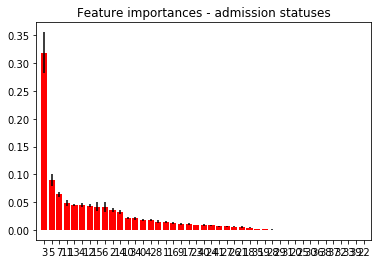

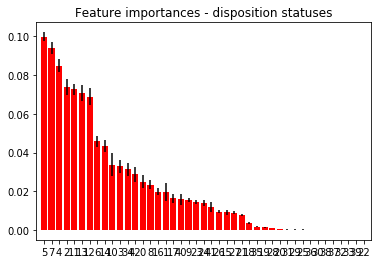

In [57]:
import matplotlib.pyplot as plt

fi_admission = admission_classifier.feature_importances_
fi_disposition = disposition_classifier.feature_importances_

stdev_admission = np.std([tree.feature_importances_ for tree in admission_classifier.estimators_],
             axis=0)
stdev_disposition = np.std([tree.feature_importances_ for tree in disposition_classifier.estimators_],
             axis=0)

indices_admission = np.argsort(fi_admission)[::-1]
indices_disposition = np.argsort(fi_disposition)[::-1]

# Print the feature ranking
print("Feature ranking - admission statuses:")
for f in range(X_admission_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_admission[f], fi_admission[indices_admission[f]]))

print("\nFeature ranking - disposition statuses:")
for f in range(X_disposition_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_disposition[f], fi_disposition[indices_disposition[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances - admission statuses")
plt.bar(range(X_admission_train.shape[1]), fi_admission[indices_admission],
       color="r", yerr=stdev_admission[indices_admission], align="center")
plt.xticks(range(X_admission_train.shape[1]), indices_admission)
plt.xlim([-1, X_admission_train.shape[1]])
plt.show()

plt.figure()
plt.title("Feature importances - disposition statuses")
plt.bar(range(X_disposition_train.shape[1]), fi_disposition[indices_disposition],
       color="r", yerr=stdev_disposition[indices_disposition], align="center")
plt.xticks(range(X_disposition_train.shape[1]), indices_disposition)
plt.xlim([-1, X_disposition_train.shape[1]])
plt.show()

---

---

---

# Extra Tree Classifier

### 1) Construct training and testing 
TODO: validation sets

In [46]:
# Separate input and output features 
# Original df is not mutated
X = df.drop(['discharge_disposition_id','admission_type_id'], axis=1)

# columns of the values we want to predict which we use to train our model
y_disposition = df['discharge_disposition_id']
y_admission = df['admission_type_id']

# For disposition statuses
X_disposition_train, X_disposition_test, y_disposition_train, y_disposition_test = train_test_split(X, y_disposition, test_size=0.3)

# For admission statuses
X_admission_train, X_admission_test, y_admission_train, y_admission_test = train_test_split(X, y_admission, test_size=0.3)

### 2) Train model

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

admission_classifier = ExtraTreesClassifier(n_estimators=100, n_jobs=-1 )
disposition_classifier = ExtraTreesClassifier(n_estimators=100, n_jobs=-1 )

admission_classifier.fit(X_admission_train, y_admission_train)
disposition_classifier.fit(X_disposition_train, y_disposition_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### 3) Predict!

In [48]:
# predict classes for data in test_set
predict_admission = admission_classifier.predict(X_admission_test) 
predict_disposition = disposition_classifier.predict(X_disposition_test)

### 4) Evaluate our models

In [49]:
print(classification_report(predict_admission, y_admission_test))

             precision    recall  f1-score   support

          1       0.95      0.85      0.90     17952
          2       0.33      0.57      0.41      3212
          3       0.78      0.66      0.72      6620
          4       0.00      0.00      0.00         0
          5       0.65      0.69      0.67      1299
          6       0.68      0.95      0.79      1128
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0

avg / total       0.82      0.77      0.79     30211



/Users/Domingo/deep_health/training_model/env/lib/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [50]:
print(classification_report(predict_disposition, y_disposition_test))

             precision    recall  f1-score   support

          1       0.96      0.64      0.77     26901
          2       0.00      0.33      0.01         6
          3       0.29      0.46      0.35      2595
          4       0.00      0.00      0.00         2
          5       0.00      0.50      0.01         2
          6       0.06      0.35      0.10       619
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         0
         10       0.00      0.00      0.00         0
         11       0.01      0.56      0.02         9
         12       0.00      0.00      0.00         1
         13       0.00      0.00      0.00         2
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00      0.00      0.00         0
         18       0.02      0.33      0.03   

/Users/Domingo/deep_health/training_model/env/lib/python3.4/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Feature importances

Feature ranking - admission statuses:
1. feature 3 (0.305032)
2. feature 5 (0.070962)
3. feature 7 (0.054400)
4. feature 11 (0.048102)
5. feature 6 (0.046378)
6. feature 4 (0.044713)
7. feature 13 (0.042659)
8. feature 12 (0.042244)
9. feature 2 (0.039849)
10. feature 15 (0.039580)
11. feature 14 (0.038517)
12. feature 10 (0.026723)
13. feature 8 (0.020541)
14. feature 0 (0.020367)
15. feature 34 (0.018657)
16. feature 42 (0.018634)
17. feature 1 (0.018326)
18. feature 9 (0.015490)
19. feature 16 (0.014121)
20. feature 17 (0.011387)
21. feature 23 (0.010720)
22. feature 24 (0.009678)
23. feature 40 (0.007760)
24. feature 26 (0.007415)
25. feature 27 (0.007305)
26. feature 21 (0.005959)
27. feature 41 (0.005337)
28. feature 18 (0.004200)
29. feature 35 (0.001625)
30. feature 19 (0.001613)
31. feature 28 (0.000947)
32. feature 29 (0.000216)
33. feature 31 (0.000208)
34. feature 20 (0.000207)
35. feature 25 (0.000068)
36. feature 36 (0.000028)
37. feature 30 (0.000024)
38. feature 38 (0.0

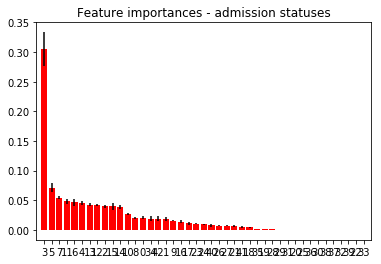

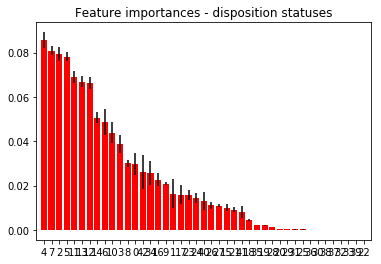

In [51]:
import matplotlib.pyplot as plt

fi_admission = admission_classifier.feature_importances_
fi_disposition = disposition_classifier.feature_importances_

stdev_admission = np.std([tree.feature_importances_ for tree in admission_classifier.estimators_],
             axis=0)
stdev_disposition = np.std([tree.feature_importances_ for tree in disposition_classifier.estimators_],
             axis=0)

indices_admission = np.argsort(fi_admission)[::-1]
indices_disposition = np.argsort(fi_disposition)[::-1]

# Print the feature ranking
print("Feature ranking - admission statuses:")
for f in range(X_admission_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_admission[f], fi_admission[indices_admission[f]]))

print("\nFeature ranking - disposition statuses:")
for f in range(X_disposition_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_disposition[f], fi_disposition[indices_disposition[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances - admission statuses")
plt.bar(range(X_admission_train.shape[1]), fi_admission[indices_admission],
       color="r", yerr=stdev_admission[indices_admission], align="center")
plt.xticks(range(X_admission_train.shape[1]), indices_admission)
plt.xlim([-1, X_admission_train.shape[1]])
plt.show()

plt.figure()
plt.title("Feature importances - disposition statuses")
plt.bar(range(X_disposition_train.shape[1]), fi_disposition[indices_disposition],
       color="r", yerr=stdev_disposition[indices_disposition], align="center")
plt.xticks(range(X_disposition_train.shape[1]), indices_disposition)
plt.xlim([-1, X_disposition_train.shape[1]])
plt.show()

It's interesting that Extra Trees assign slightly different weights for disposition statuses. 

## Models to try:


Adaboost

Gradient Tree Boosting 

Try VotingClassifier from scikit at the end


## Things to try:
predict time in hospital